In [3]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
digits=load_digits()

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [8]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

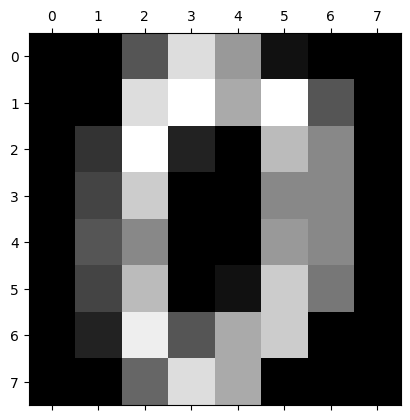

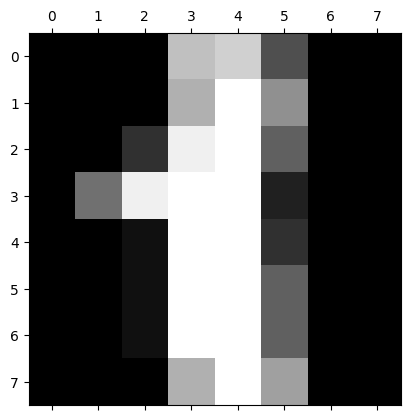

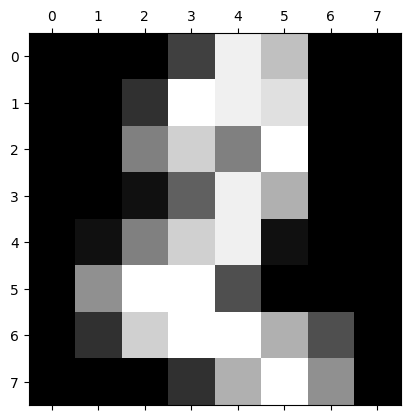

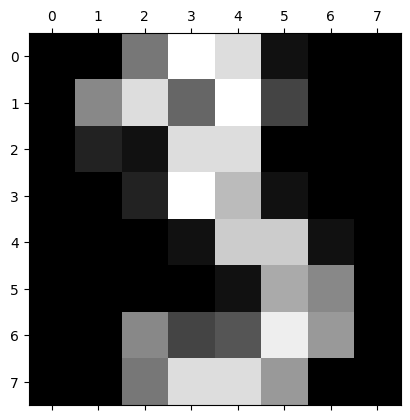

In [7]:
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i])

In [10]:
digits.target[:4]

array([0, 1, 2, 3])

In [12]:
df=pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [13]:
df['target']=digits.target

In [14]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [16]:
X=df.drop('target',axis='columns')
y=df['target']
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [32]:
len(X_train)

1437

In [33]:
model=RandomForestClassifier(n_estimators=50)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [34]:
model.score(X_test,y_test)

0.9638888888888889

In [35]:
y_predicted=model.predict(X_test)
y_predicted

array([3, 5, 3, 3, 6, 8, 8, 2, 9, 2, 2, 3, 3, 0, 7, 2, 8, 7, 6, 7, 6, 0,
       3, 2, 7, 2, 3, 0, 2, 7, 0, 3, 5, 6, 2, 9, 3, 3, 7, 6, 0, 5, 8, 7,
       3, 1, 3, 7, 7, 9, 4, 1, 8, 4, 0, 8, 3, 5, 4, 3, 9, 8, 9, 9, 2, 3,
       9, 1, 8, 6, 9, 2, 3, 4, 2, 7, 1, 1, 2, 6, 0, 9, 0, 2, 4, 2, 7, 6,
       2, 2, 2, 5, 7, 7, 3, 8, 5, 4, 9, 9, 3, 1, 6, 6, 1, 8, 3, 5, 6, 1,
       3, 6, 1, 7, 0, 9, 0, 0, 6, 0, 6, 9, 8, 6, 1, 2, 7, 1, 3, 2, 1, 3,
       4, 3, 7, 4, 9, 6, 7, 3, 8, 4, 3, 3, 1, 1, 2, 9, 8, 9, 6, 9, 8, 9,
       4, 5, 4, 8, 1, 9, 6, 2, 0, 0, 7, 2, 7, 6, 1, 0, 4, 8, 3, 5, 7, 8,
       1, 6, 7, 3, 0, 5, 7, 1, 2, 9, 6, 4, 3, 0, 5, 1, 3, 1, 2, 4, 3, 1,
       1, 9, 2, 9, 7, 1, 2, 4, 5, 1, 9, 4, 8, 8, 5, 4, 2, 7, 1, 8, 5, 4,
       3, 9, 0, 1, 1, 2, 2, 9, 1, 7, 3, 2, 5, 4, 3, 3, 9, 7, 7, 8, 8, 7,
       4, 2, 5, 3, 1, 2, 9, 8, 2, 3, 2, 3, 3, 9, 9, 1, 0, 8, 5, 6, 0, 4,
       1, 6, 8, 1, 5, 2, 3, 3, 7, 5, 0, 4, 3, 4, 1, 9, 5, 8, 3, 4, 4, 7,
       6, 7, 3, 3, 9, 3, 7, 8, 2, 3, 8, 0, 0, 5, 1,

In [37]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
cm

array([[28,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 38,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 43,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0, 50,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 37,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  1, 24,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 27,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 38,  1,  0],
       [ 0,  2,  0,  1,  0,  0,  0,  0, 28,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 34]], dtype=int64)

Text(95.72222222222221, 0.5, 'Actual')

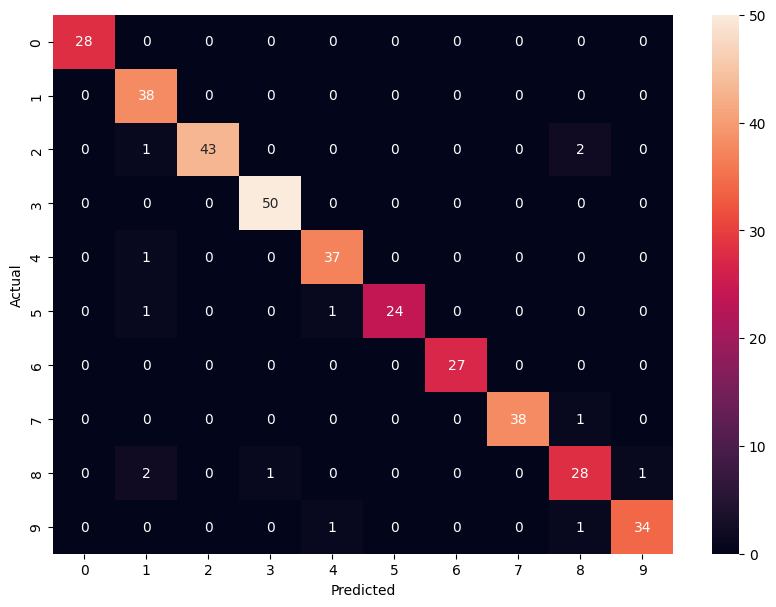

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')